## **APRENDIZAJE NO SUPERVISADO**

### **Clustering**

En este notebook veremos, dentro de la técnica de `clustering`, los dos algoritmos estudiados en la parte teórica: K-means y DBSCAN.

### *`K-means`*

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) de K-means.


Para abordar esta temática, generaremos varios datasets sintéticos. Podremos observar que estos datos vienen con una etiqueta asociada, donde nos indica a qué cluster pertenecen. La idea, en realidad, es utilizar los métodos de clusting estudiados para poder identificar los clusters sin conocer esta etiqueta.

El algoritmo _k-means_ busca un número predeterminado de grupos (_clusters_) dentro de un dataset multidimensional que no está etiquetado.
Lo hace a través de una definición simple de cómo se vería un clustering óptimo:

- El "centro de un grupo" tiene la posición promedio de todos los puntos que pertenecen al grupo.
- Cada punto está más cerca a su propio centro de grupo que al de otros grupos.

El algoritmo Expectación–maximización (E–M) es un método poderoso que aparece en una variedad de contextos dentro de la ciencia de datos.
_k-means_ es una aplicación particularmente simple y fácil de entender de la aplicación de este algoritmo. Ahora realizaremos un paso breve a través de él.
En resumen, el enfoque de expectación–maximización consiste en lo siguiente:

1. Adivina algunos centros de clusters.
2. Repetir hasta converger:
   1. *Paso–E*: asignar puntos al cluster más cercano.
   2. *Paso-M*: recalcular los centros de cada cluster como el promedio de los puntos pertenecientes al grupo.

El paso de expectación se llama así porque involucra actualizar nuestra expectativa sobre los clusters a los que pertenece cada punto.
El punto de maximización se llama así porque involucra maximizar el ajuste de alguna función objetivo que defina los centros de cada cluster–en este caso, la maximización se obtiene al estimar el promedio de todos los puntos que están en el cluster.

La literatura sobre este método es vasta, pero se puede resumir así: en circunstancias típicas, cada repetición del Paso-E y del Paso-M resultará siempre en una estimación mejor de las características del clustering.

Podemos visualizar el funcionamiento del algoritmo en la siguiente imagen. 
Para los datos que estamos utilizando, se converge al resultado en tan solo tres iteraciones.

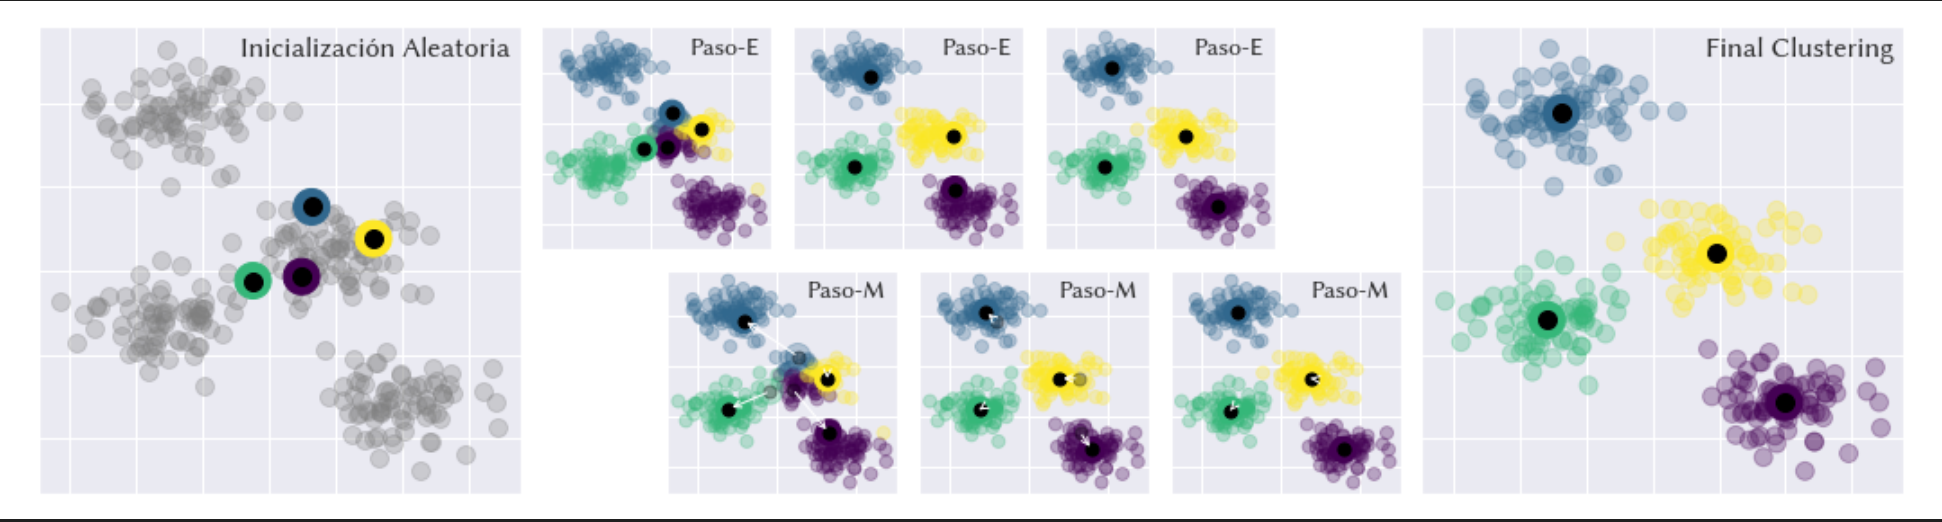


![SegmentLocal](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif "segment")

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()

In [20]:
from sklearn.datasets import make_blobs, make_moons

# Creamos los datasets sintéticos

X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0) 
# 1000 muestras, 4 centros, 0.5 desviación típica, 2 características, semilla 0
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0) 
# 1000 muestras, 4 centros, 1 desviación típica, 2 características, semilla 0 
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0,) # 1000 muestras, 2 características, semilla 0 

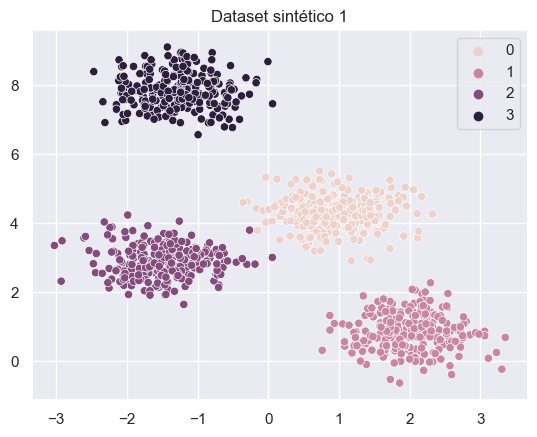

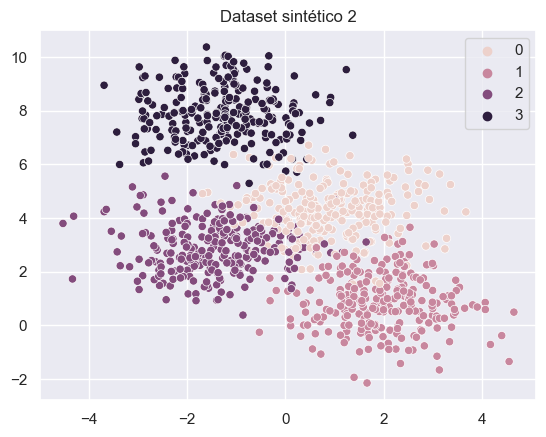

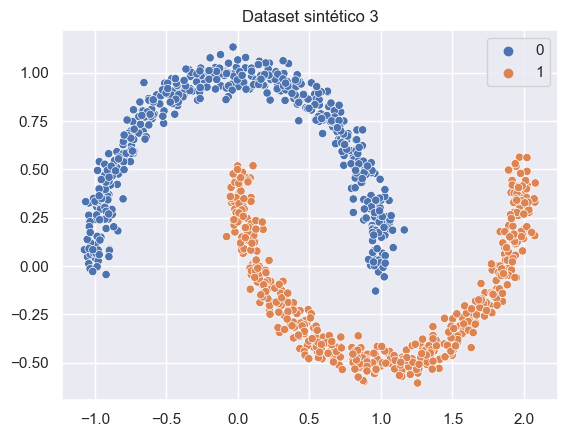

In [21]:
# Ploteamos cada uno de ellos

sns.scatterplot(x = X1[:,0], y = X1[:,1], hue = y1) 
# se grafica la primera columna contra la segunda columna de X1, hue es la variable que se usa para colorear los puntos (en este caso, la clase)
plt.title('Dataset sintético 1')
plt.show()
sns.scatterplot(x = X2[:,0], y = X2[:,1], hue = y2)
plt.title('Dataset sintético 2')
plt.show()
sns.scatterplot(x = X3[:,0], y = X3[:,1], hue = y3) 
plt.title('Dataset sintético 3') 
plt.show()


Procedemos a instanciar los modelos para cada dataset, indicando en cada uno la cantidad de clusters.

In [22]:
from sklearn.cluster import KMeans

kmeans_1 = KMeans(n_clusters=4, random_state=0) # 4 clusters para el dataset 
kmeans_2 = KMeans(n_clusters=4, random_state=0)
kmeans_3 = KMeans(n_clusters=2, random_state=0)

In [23]:
# Entrenamos. A diferencia del aprendizaje supervisado, notarán que ya no le pasamos una etiqueta de salida. Solo los atributos.

kmeans_1.fit(X1) # Entrenamos el modelo con los datos de entrenamiento (X1) y sin etiquetas de salida (y1)
kmeans_2.fit(X2) # fit(X,y) ///  fit(X_train,y_train)
kmeans_3.fit(X3)

c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mario_Suaza\.conda\envs\DataScience\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWa

KMeans(n_clusters=2, random_state=0)

In [24]:
# Aquí, corroboramos la etiqueta que el modelo asoció a cada una de las instancias. Repetimos para los tres modelos.

# Modelo 1
etiquetas_1 = kmeans_1.labels_ # Etiquetas de cada instancia
centros_1 = kmeans_1.cluster_centers_ # Coordenadas de los centroides

# Modelo 2
etiquetas_2 = kmeans_2.labels_
centros_2 = kmeans_2.cluster_centers_

# Modelo 3
etiquetas_3 = kmeans_3.labels_
centros_3 = kmeans_3.cluster_centers_


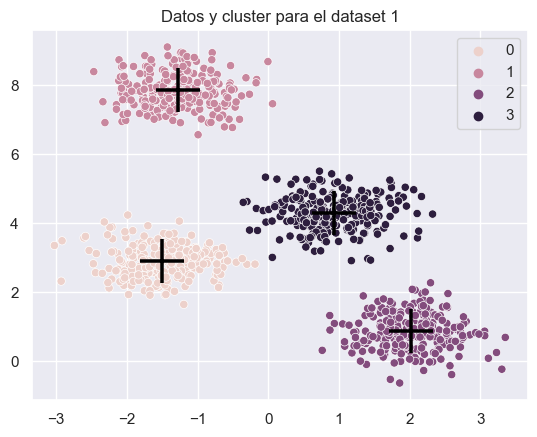

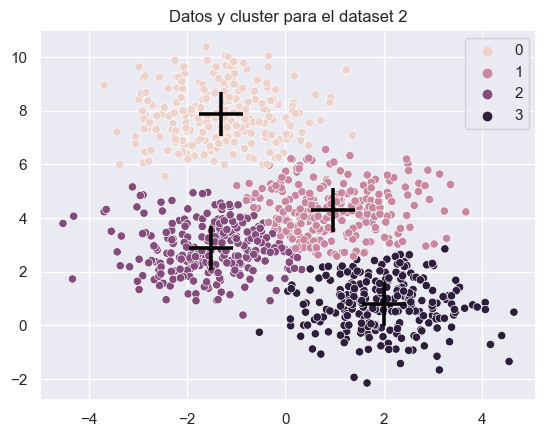

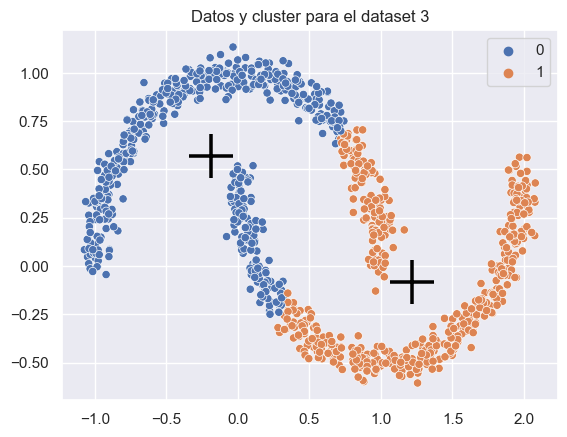

In [25]:
# Pasamos a graficar

# Dataset 1
sns.scatterplot(x = X1[:, 0], y = X1[:, -1], hue = etiquetas_1) 
# Graficamos los datos y los coloreamos según el cluster al que pertenecen (etiquetas)
sns.scatterplot(x = centros_1[:, 0], y = centros_1[:, 1],color='black', marker="+", s=1000) 
# Graficamos los centroides de cada cluster 
plt.title('Datos y cluster para el dataset 1')
plt.show()

# Dataset 2
sns.scatterplot(x = X2[:, 0], y = X2[:, -1], hue = etiquetas_2) # 
sns.scatterplot(x = centros_2[:, 0], y = centros_2[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para el dataset 2')
plt.show()

# Dataset 3
sns.scatterplot(x = X3[:, 0], y = X3[:, -1], hue = etiquetas_3)
sns.scatterplot(x = centros_3[:, 0], y = centros_3[:, 1],color='black', marker="+", s=1000)
plt.title('Datos y cluster para el dataset 3')
plt.show()

Ya que el dataset sintético nos brinda la etiqueta de cada instancdia, veamos una matriz de confusión para cada uno de los datasets.

In [26]:
from sklearn.metrics import confusion_matrix

# Dataset 1
cm_1 = confusion_matrix(y1, etiquetas_1)
print("Confusion Matrix for Dataset 1:")
print(cm_1)

# Dataset 2
cm_2 = confusion_matrix(y2, etiquetas_2)
print("Confusion Matrix for Dataset 2:")
print(cm_2)

# Dataset 3
cm_3 = confusion_matrix(y3, etiquetas_3)
print("Confusion Matrix for Dataset 3:")
print(cm_3)


Confusion Matrix for Dataset 1:
[[  0   0   0 250]
 [  0   0 250   0]
 [248   0   0   2]
 [  0 250   0   0]]
Confusion Matrix for Dataset 2:
[[  4 222  18   6]
 [  0  10   3 237]
 [  1  19 228   2]
 [245   5   0   0]]
Confusion Matrix for Dataset 3:
[[380 120]
 [129 371]]


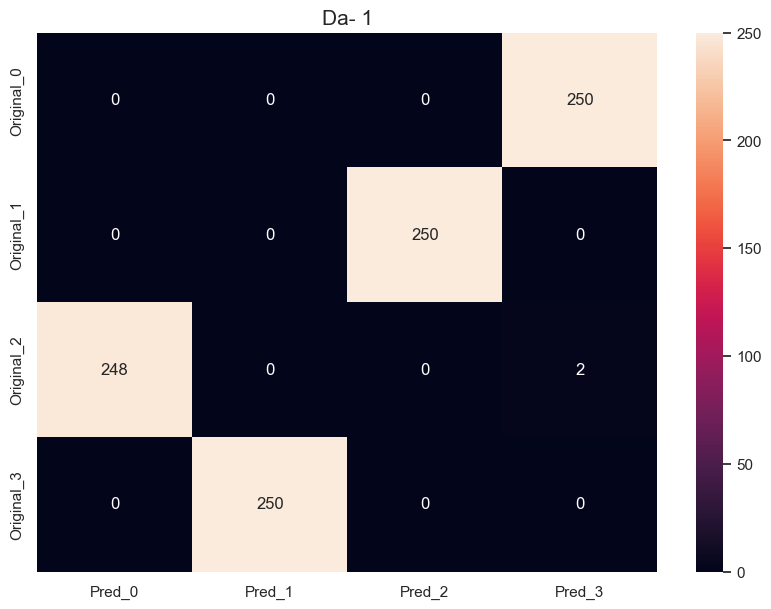

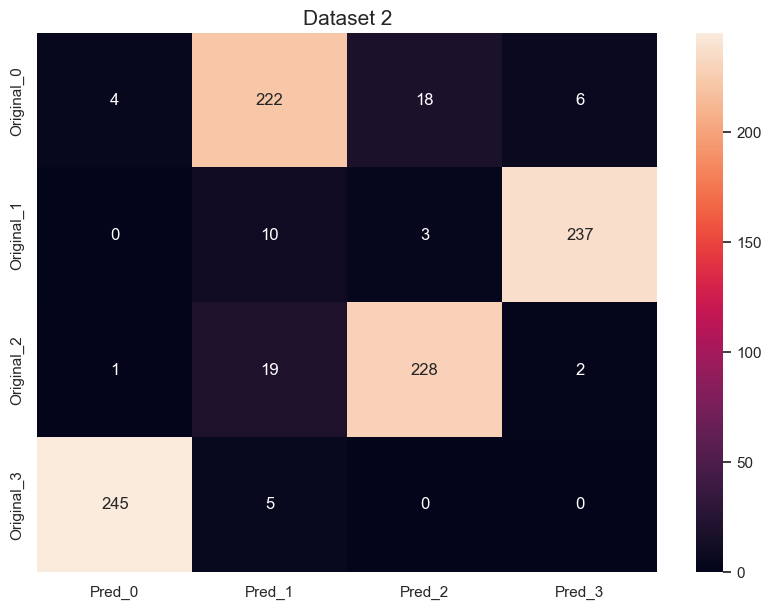

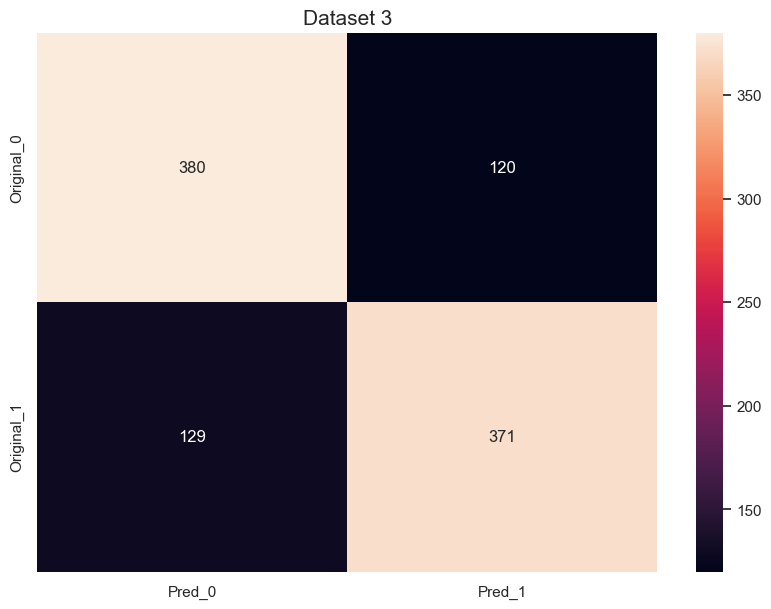

In [27]:
from sklearn.metrics import confusion_matrix

# Dataset 1
cm = confusion_matrix(y1, etiquetas_1) # y1: etiquetas originales, etiquetas_1: etiquetas predichas por el modelo 1 
df_cm = pd.DataFrame(cm, index=[i for i in ['Original_0','Original_1','Original_2','Original_3']], 
                     # Se crea un dataframe con la matriz de confusión
                     columns=[i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d") 
plt.title('Da- 1', fontsize = 15)
plt.show()

# Dataset 2
cm = confusion_matrix(y2, etiquetas_2) # y2: etiquetas originales, etiquetas_2: etiquetas predichas por el modelo 2 
df_cm = pd.DataFrame(cm, index=[i for i in ['Original_0','Original_1','Original_2','Original_3']], # Se crea un dataframe con la matriz de confusión
                     columns=[i for i in ['Pred_0','Pred_1','Pred_2','Pred_3']] )
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Dataset 2', fontsize = 15)
plt.show()

# Dataset 3
cm = confusion_matrix(y3, etiquetas_3)
df_cm = pd.DataFrame(cm, index=[i for i in ['Original_0','Original_1']], # Se crea un dataframe con la matriz de confusión
                     columns=[i for i in ['Pred_0','Pred_1']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt="d")
plt.title('Dataset 3', fontsize = 15)
plt.show()


**En este [link](https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/) podrán acceder a otro ejemplo de implementación de K-means.** Asimismo, este [artículo](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) de Towards Data Science les puede ser de utilidad.

### *`DBSCAN`*

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) de DBSCAN.

Continuaremos trabajando con los tres datasets sintéticos que hemos generado.

DBSCAN es un algoritmo de agrupamiento muy popular que se basa en la densidad. La idea es que si un determinado punto pertenece a un grupo, debe estar cerca de muchos otros puntos del mismo grupo. Esos puntos deben estar cerca entre sí. Por lo tanto, el algoritmo define un grupo como una región de alta densidad. También funciona bien si los grupos son de forma arbitraria. El algoritmo es bastante simple y tiene solo dos parámetros: el radio de la vecindad (eps) y el número mínimo de puntos para formar un grupo (minPts). 

In [28]:
from sklearn.cluster import DBSCAN

# Especificamos los valores de los hiperparámetros de los tres modelos.

db_1 = DBSCAN(eps=0.5, min_samples=10) # eps: radio de la vecindad, min_samples: número mínimo de puntos para formar un cluster
db_2 = DBSCAN(eps=0.3, min_samples=10)
db_3 = DBSCAN(eps=0.2, min_samples=8)

In [29]:
# Realizamos el entrenamiento de los modelos instanciados

db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=8)

Las etiquetas quedan asignadas en la variable `labels_`. Cuando el **label = -1** quiere decir que esa instancia fue considerada ruido. 

Podemos consultar tanto el número de clusters como el número de instancias consideradas ruido.

In [30]:
# Consultamos las etiquetas del primer modelo
labels_1 = db_1.labels_ # Etiquetas de cada punto de datos (componente conectada) en el rango [0, n_clusters-1] o -1 si el punto de datos no está en ningún grupo.

# Número de clusters en las etiquetas, ignorando el ruido en caso que esté presente.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0) # set(labels_1): conjunto de etiquetas únicas, len(set(labels_1)): número de etiquetas únicas, -1 in labels_1: True si -1 está en labels_1, False si no está
n_noise_1 = list(labels_1).count(-1) # list(labels_1): lista de etiquetas, list(labels_1).count(-1): número de veces que aparece -1 en la lista de etiquetas

In [31]:
# Consultamos para el primer modelo

print('Número estimado de clusters: %d' % n_clusters_1) # n_clusters_1: número de clusters
print('Número estimado de puntos de ruido: %d' % n_noise_1) # n_noise_1: número de puntos de ruido

Número estimado de clusters: 4
Número estimado de puntos de ruido: 10


Definimos una función para graficar los resultados, de manera tal que coloree los distintos clusters y coloque en gris los datos que se consideran ruido. Además, fijamos en tamaño más grande las instancias que son CORES.

In [32]:
def plot_DBSCAN(X1,labels_1,db_1,n_clusters_1):
    # Creamos una máscara
    core_samples_mask_1 = np.zeros_like(db_1.labels_, dtype=bool) 
    # esta función devuelve un array de ceros con la misma forma y tipo que el array de entrada (db_1.labels_)
    core_samples_mask_1[db_1.core_sample_indices_] = True # los elementos de core_sample_indices_ se ponen a True 
    # Plot result

    
    unique_labels = set(labels_1) # crea un conjunto con los elementos de labels_1 (elimina los duplicados) y lo asigna a unique_labels (etiquetas únicas)
    colors = [plt.cm.Spectral(each) # crea una lista de colores (cada color es una lista de 4 elementos) con la paleta Spectral (cmap) 
              for each in np.linspace(0, 1, len(unique_labels))] # np.linspace devuelve números espaciados uniformemente sobre un intervalo especificado (0,1) y len(unique_labels) es el número de elementos que devuelve linspace (número de etiquetas únicas) 
    for k, col in zip(unique_labels, colors): # zip crea una lista de tuplas, cada tupla contiene un elemento de unique_labels y un elemento de colors (cada color es una lista de 4 elementos) 
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels_1 == k) # crea una máscara con los elementos de labels_1 que son iguales a k (etiquetas únicas) y lo asigna a class_member_mask (máscara de miembros de clase) 

        xy = X1[class_member_mask & core_samples_mask_1] # crea un array con los elementos de X1 que cumplen las dos condiciones (class_member_mask y core_samples_mask_1) y lo asigna a xy 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14) # pinta los puntos de xy (coordenada x y coordenada y) con el color de la paleta Spectral (col) y con un tamaño de 14 (markersize) 

        xy = X1[class_member_mask & ~core_samples_mask_1] # crea un array con los elementos de X1 que cumplen la primera condición (class_member_mask) y no cumplen la segunda (core_samples_mask_1) y lo asigna a xy 
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6) # pinta los puntos de xy (coordenada x y coordenada y) con el color de la paleta Spectral (col) y con un tamaño de 6 (markersize) 
    plt.title('Número estimado de clusters: %d' % n_clusters_1, fontsize = 15) # pone un título al gráfico con el número de clusters estimado (n_clusters_1) 
    plt.show()
    return

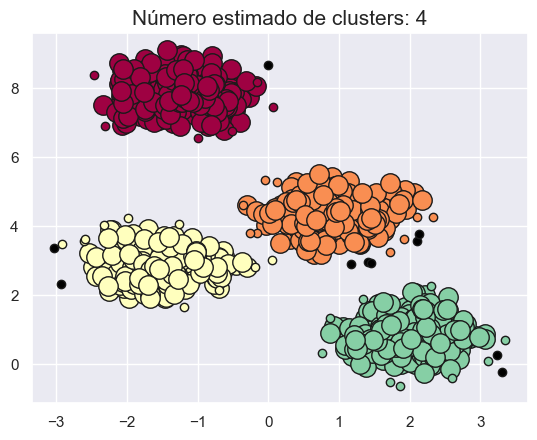

In [33]:
plot_DBSCAN(X1,labels_1,db_1,n_clusters_1)

**Vamos a pasar ahora al dataset 2 y 3**.

Estimated number of clusters: 5
Estimated number of noise points: 537


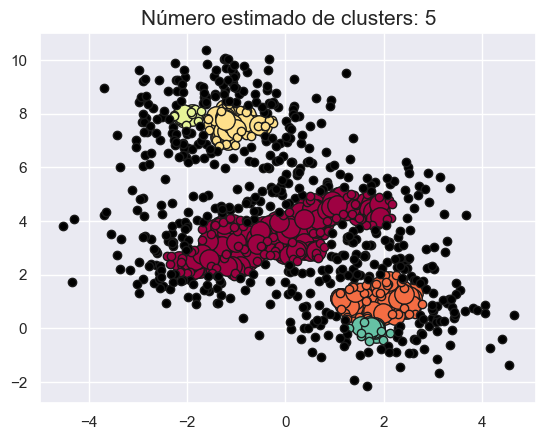

In [34]:
# Consultamos las etiquetas
labels_2 = db_2.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels_2)) - (1 if -1 in labels_2 else 0) # -1 es el ruido (outliers), el ruido son los puntos que no pertenecen a ningun cluster (no son CORES) y por lo tanto no tienen etiqueta.
n_noise_2 = list(labels_2).count(-1)

print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of noise points: %d' % n_noise_2)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_2 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_2[db_2.core_sample_indices_] = True

plot_DBSCAN(X2,labels_2,db_2,n_clusters_2)

Estimated number of clusters: 2
Estimated number of noise points: 0


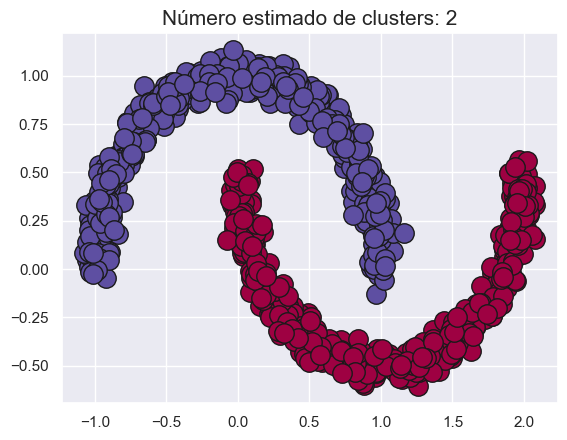

In [35]:
# Consultamos las etiquetas
labels_3 = db_3.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels_3)) - (1 if -1 in labels_3 else 0)
n_noise_3 = list(labels_3).count(-1)

print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of noise points: %d' % n_noise_3)

# Armamos una mascara, con unos en los datos que son CORES.
core_samples_mask_3 = np.zeros_like(db_2.labels_, dtype=bool)
core_samples_mask_3[db_2.core_sample_indices_] = True

plot_DBSCAN(X3,labels_3,db_3,n_clusters_3)